In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import json

In [2]:
all_every = "../data_info/all/dict_label_info.pkl"

In [3]:
all_subsets = ["../data_info/subsets/0/",
               "../data_info/subsets/1/",
               "../data_info/subsets/2/",
               "../data_info/subsets/3/",
               "../data_info/subsets/4/",
               "../data_info/subsets/5/"]

In [4]:
def reject_outliers(data, m = 2.):
    data = np.array(data)
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

def reject_outliers_2(data, m = 2.):
    data = np.array(data)
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/(mdev if mdev else 1.)
    return data[s<m]

def get_class_img_bar(total_imgs,lbs):
    index = total_imgs.argsort()
    total_imgs = total_imgs[index][::-1]
    lbs = lbs[index][::-1]

    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(20,20))
    ax.barh(range(len(total_imgs)), total_imgs)
    ax.set_yticks(range(len(total_imgs)))
    ax.set_yticklabels(lbs)
    ax.invert_yaxis() 
    ax.set_xlabel('freq')
    ax.set_title('labels')
    plt.tight_layout()
    plt.show()
    
def display_ratios(subset_dict_info, subset_names_to_clsids, exclude_bkgrd=False):
    sns.set(color_codes=True)
    lbs = []
    total_imgs = []
    dict_balanced = {}
    for key, info in subset_dict_info.items():
        sns.distplot(reject_outliers(info.aspect_ratios))
        if key != "background":
            lbs.append(key)
            total_imgs.append(len(info.imgs))
        if key == "background" and exclude_bkgrd:
            pass
        else:
            dict_balanced[subset_names_to_clsids[key]] = list(set(info.imgs))
    plt.ylim(0, 3)
    plt.show()
    lbs = np.array(lbs)
    total_imgs = np.array(total_imgs)
    return total_imgs, lbs, dict_balanced

../data_info/subsets/0/dict_label_info.pkl


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


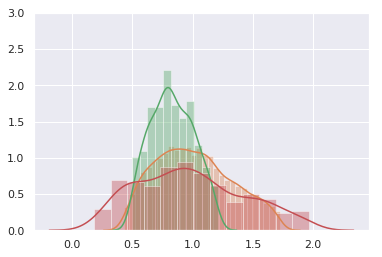

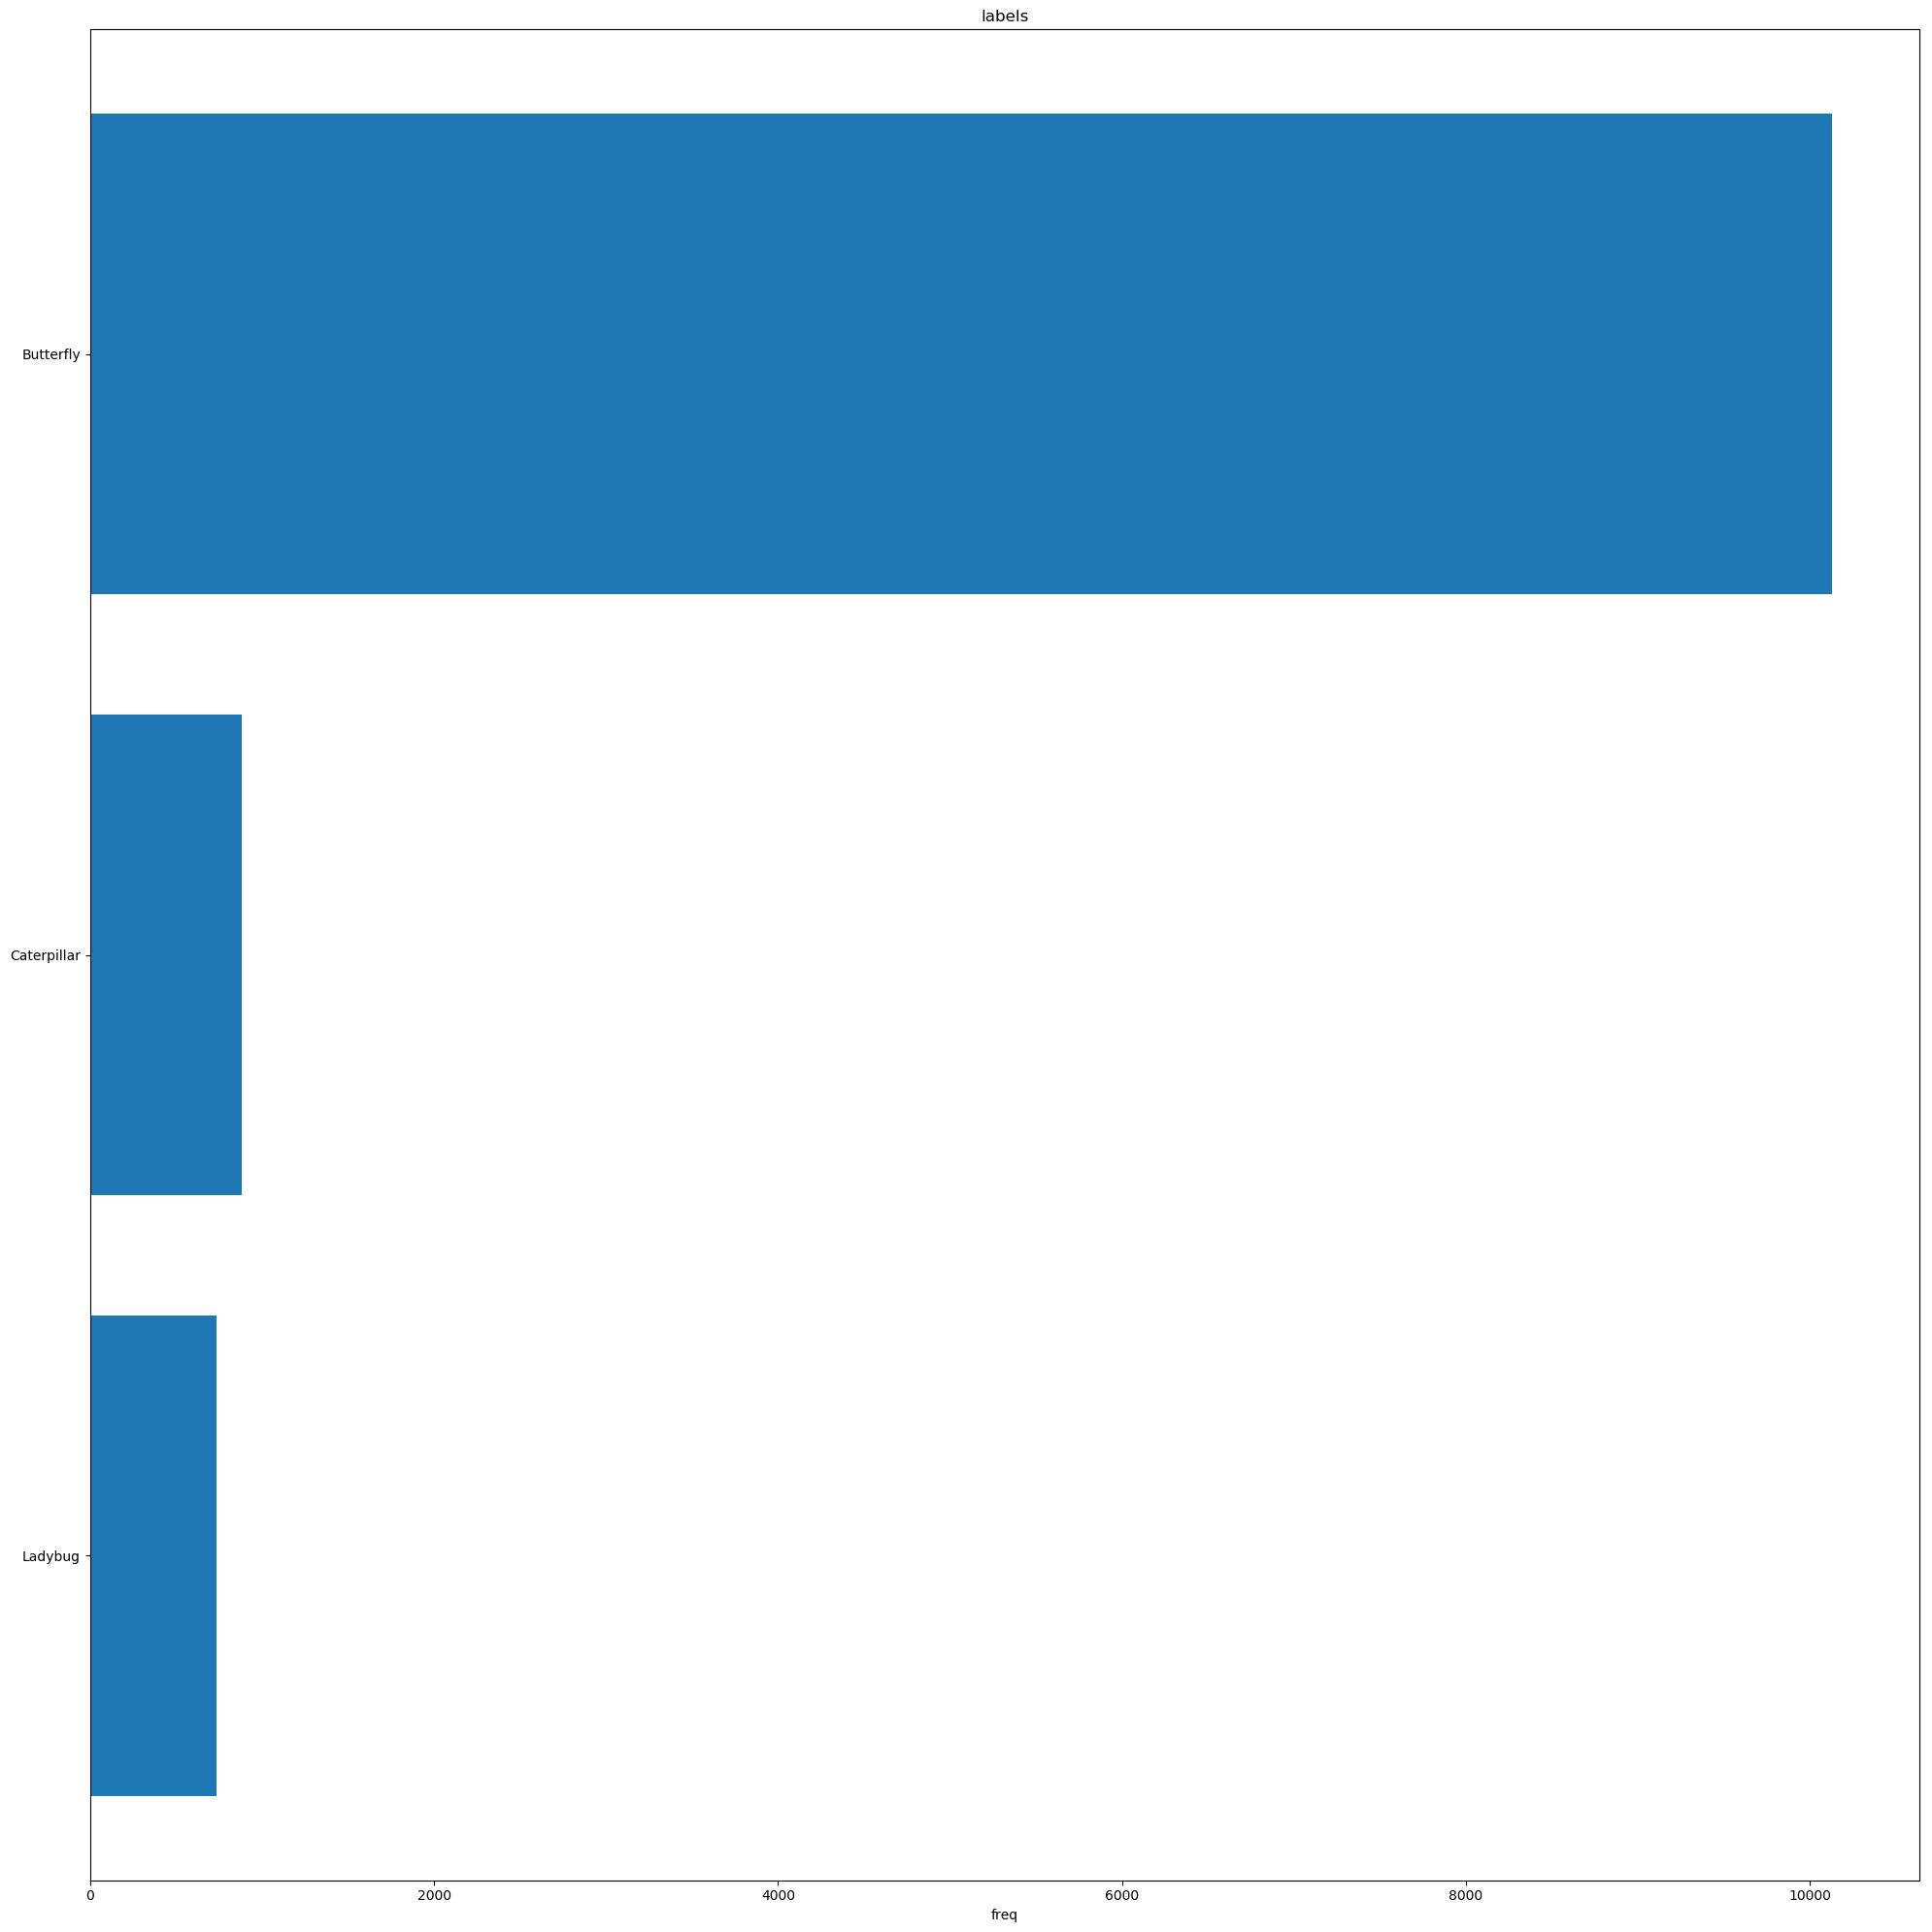

../data_info/subsets/1/dict_label_info.pkl


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


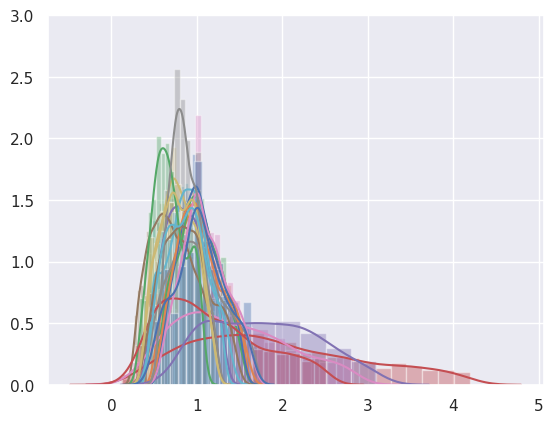

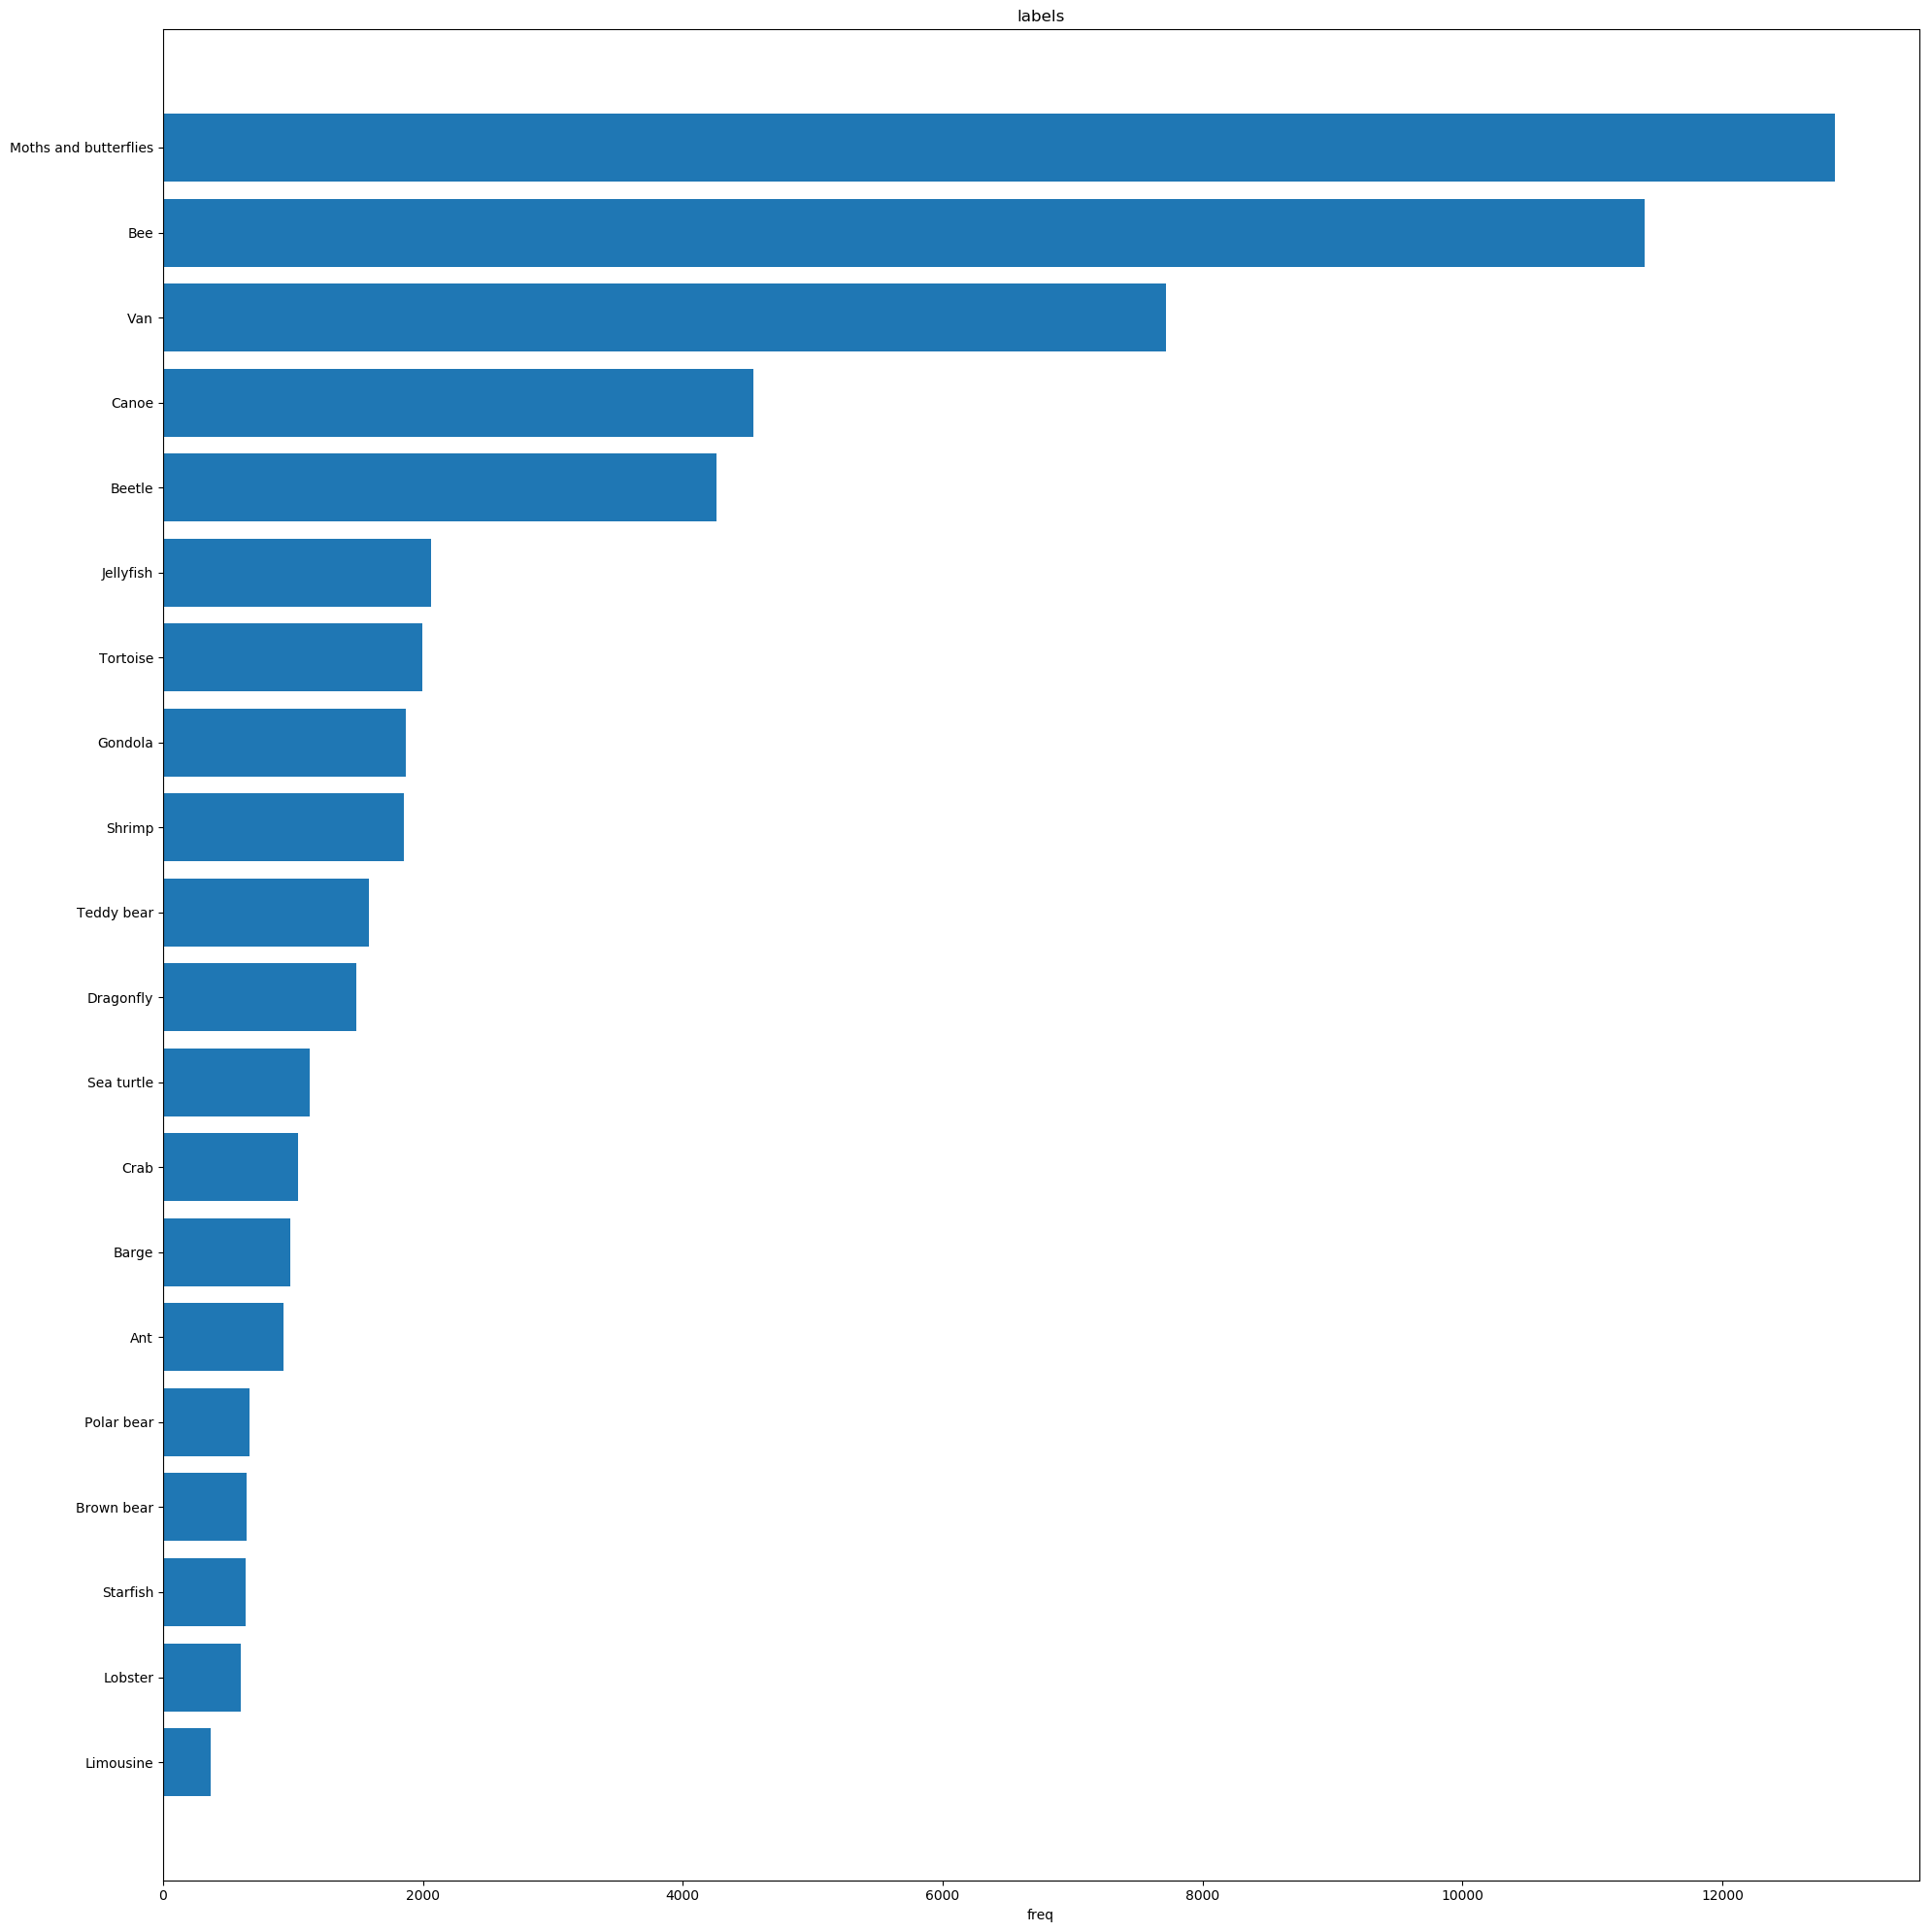

../data_info/subsets/2/dict_label_info.pkl


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


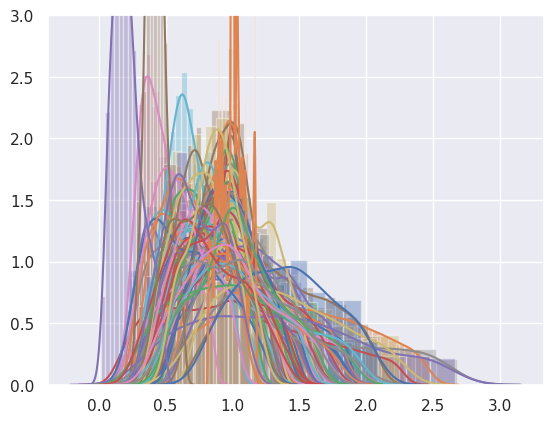

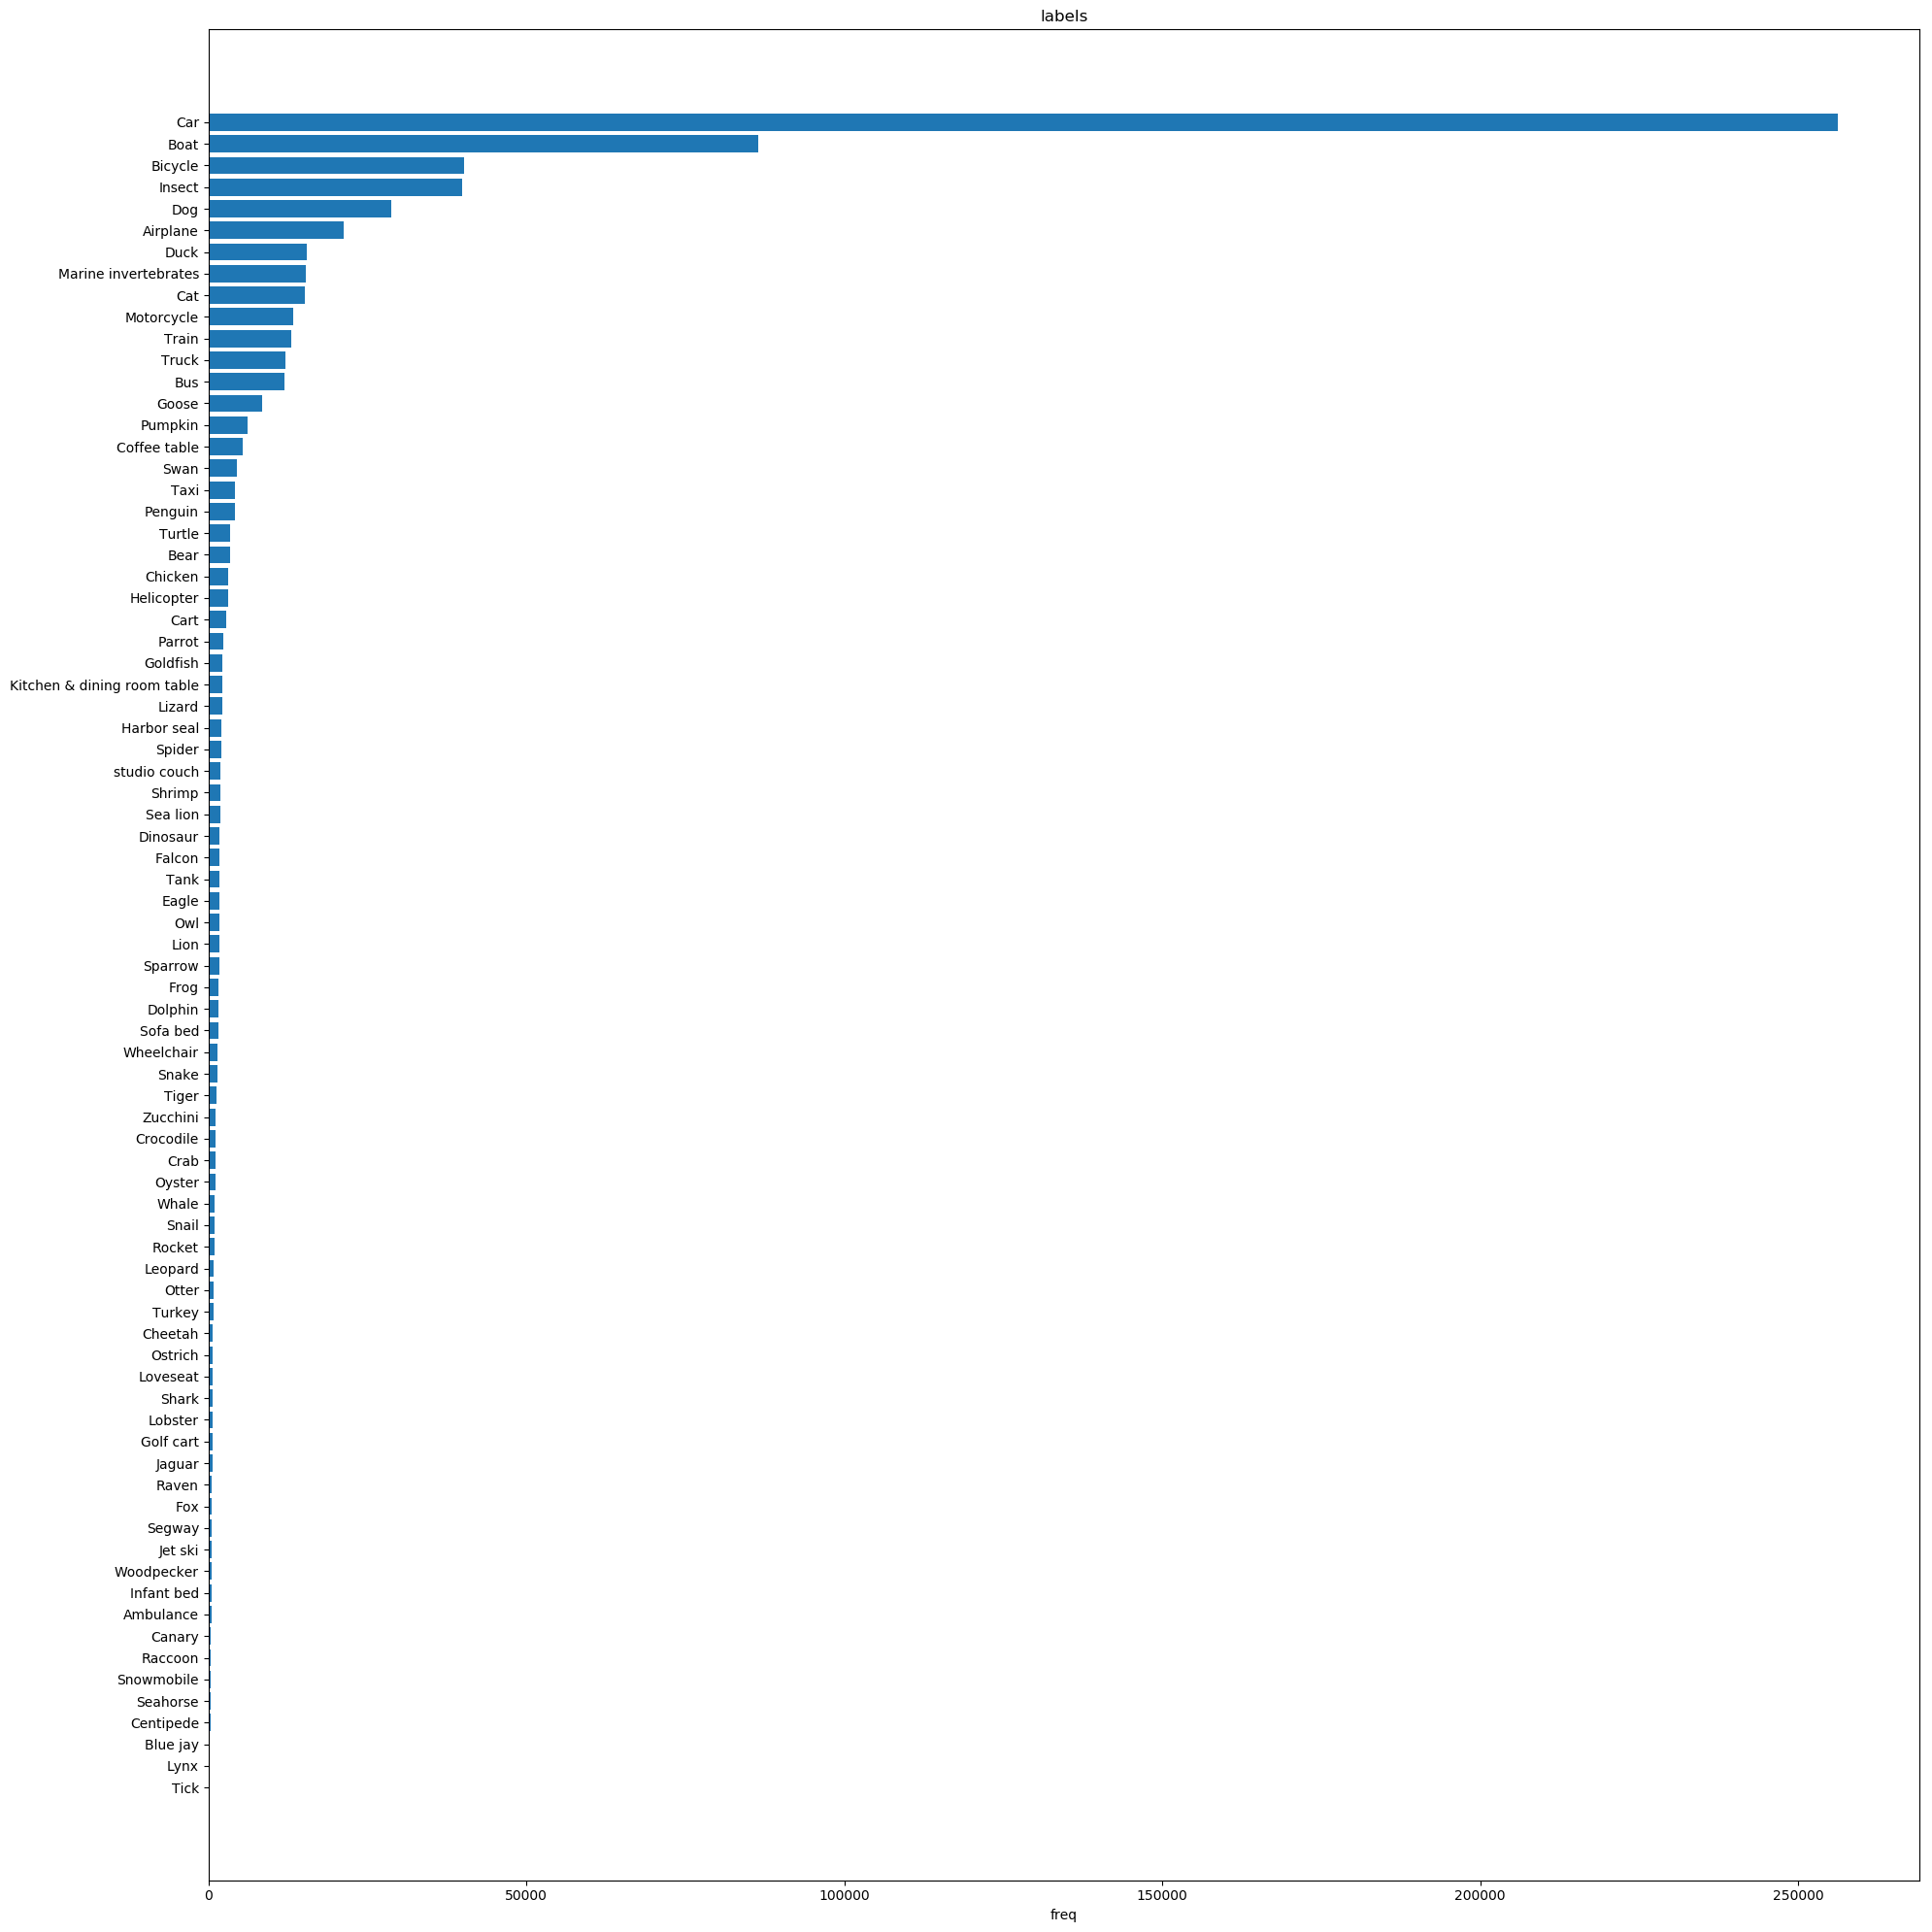

../data_info/subsets/3/dict_label_info.pkl


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


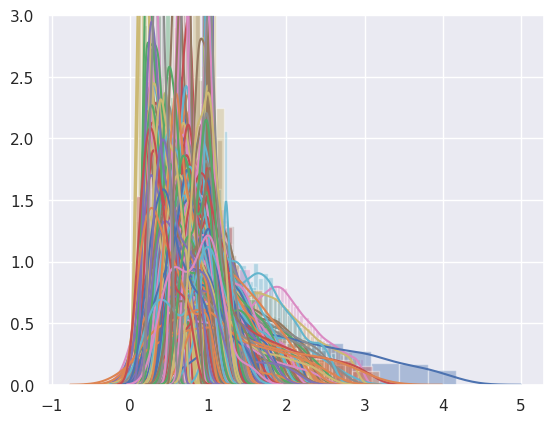

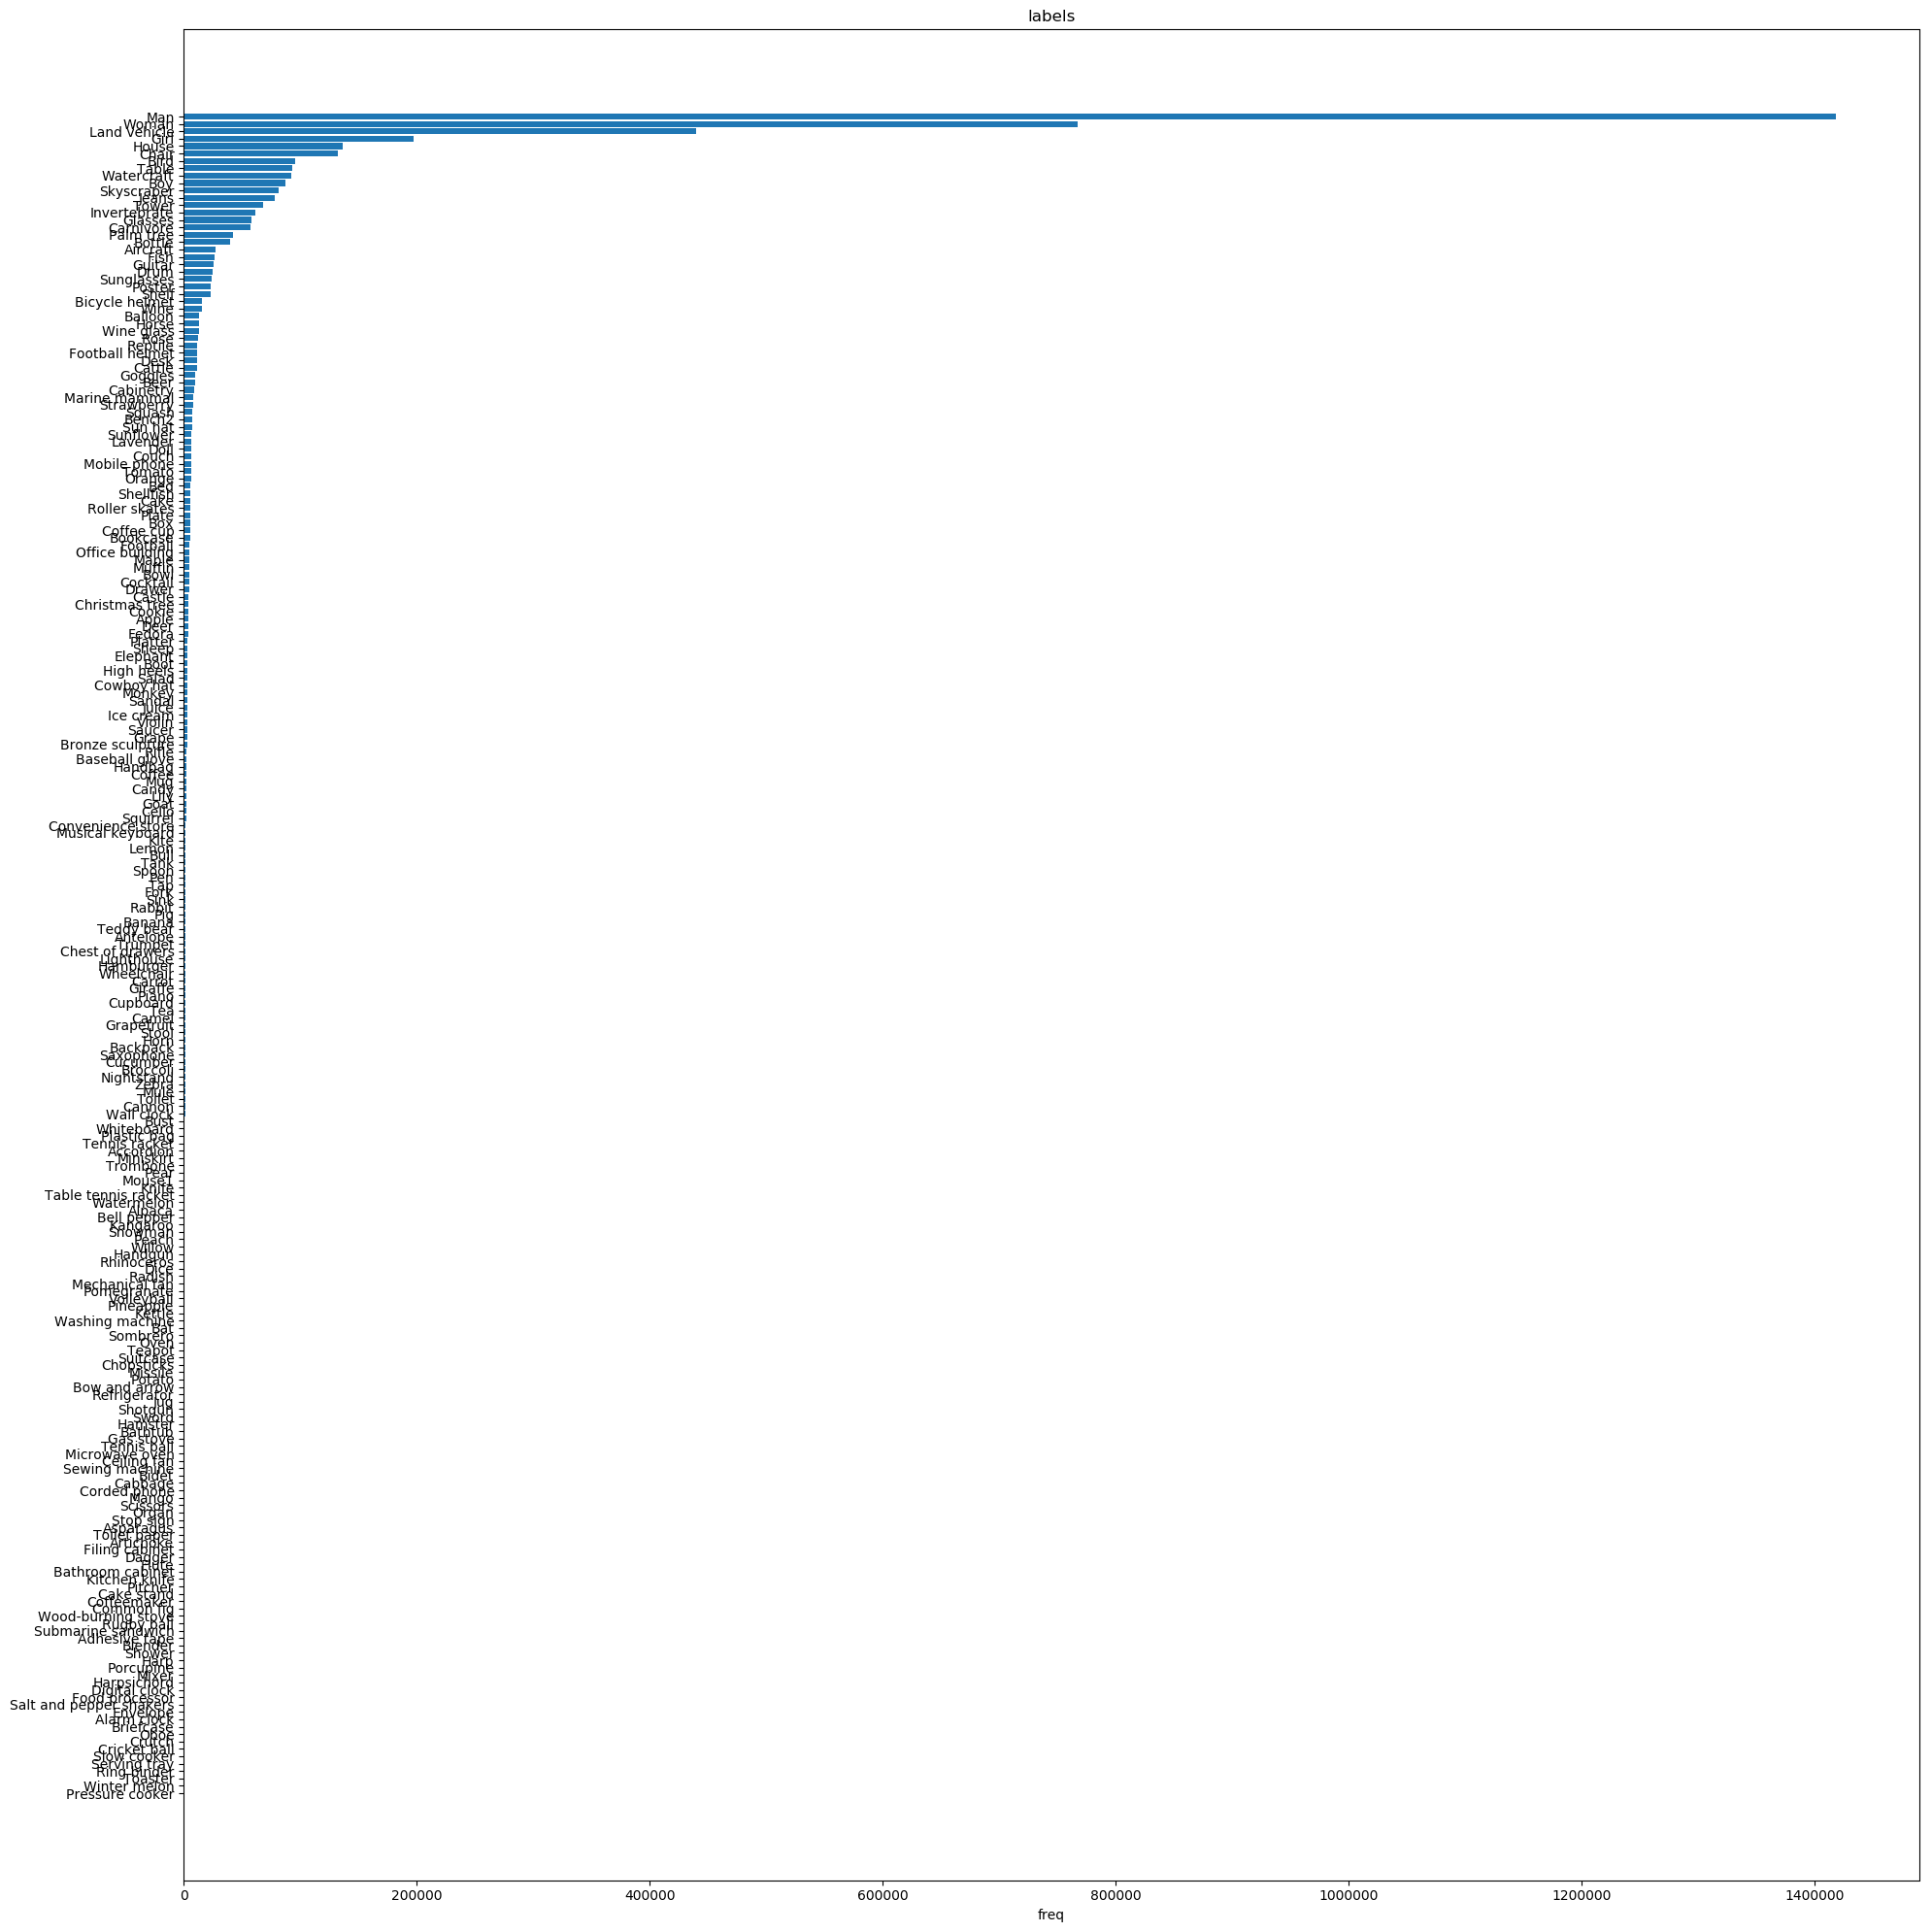

../data_info/subsets/4/dict_label_info.pkl


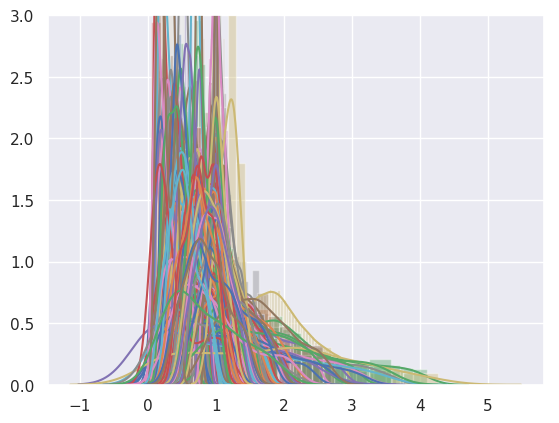

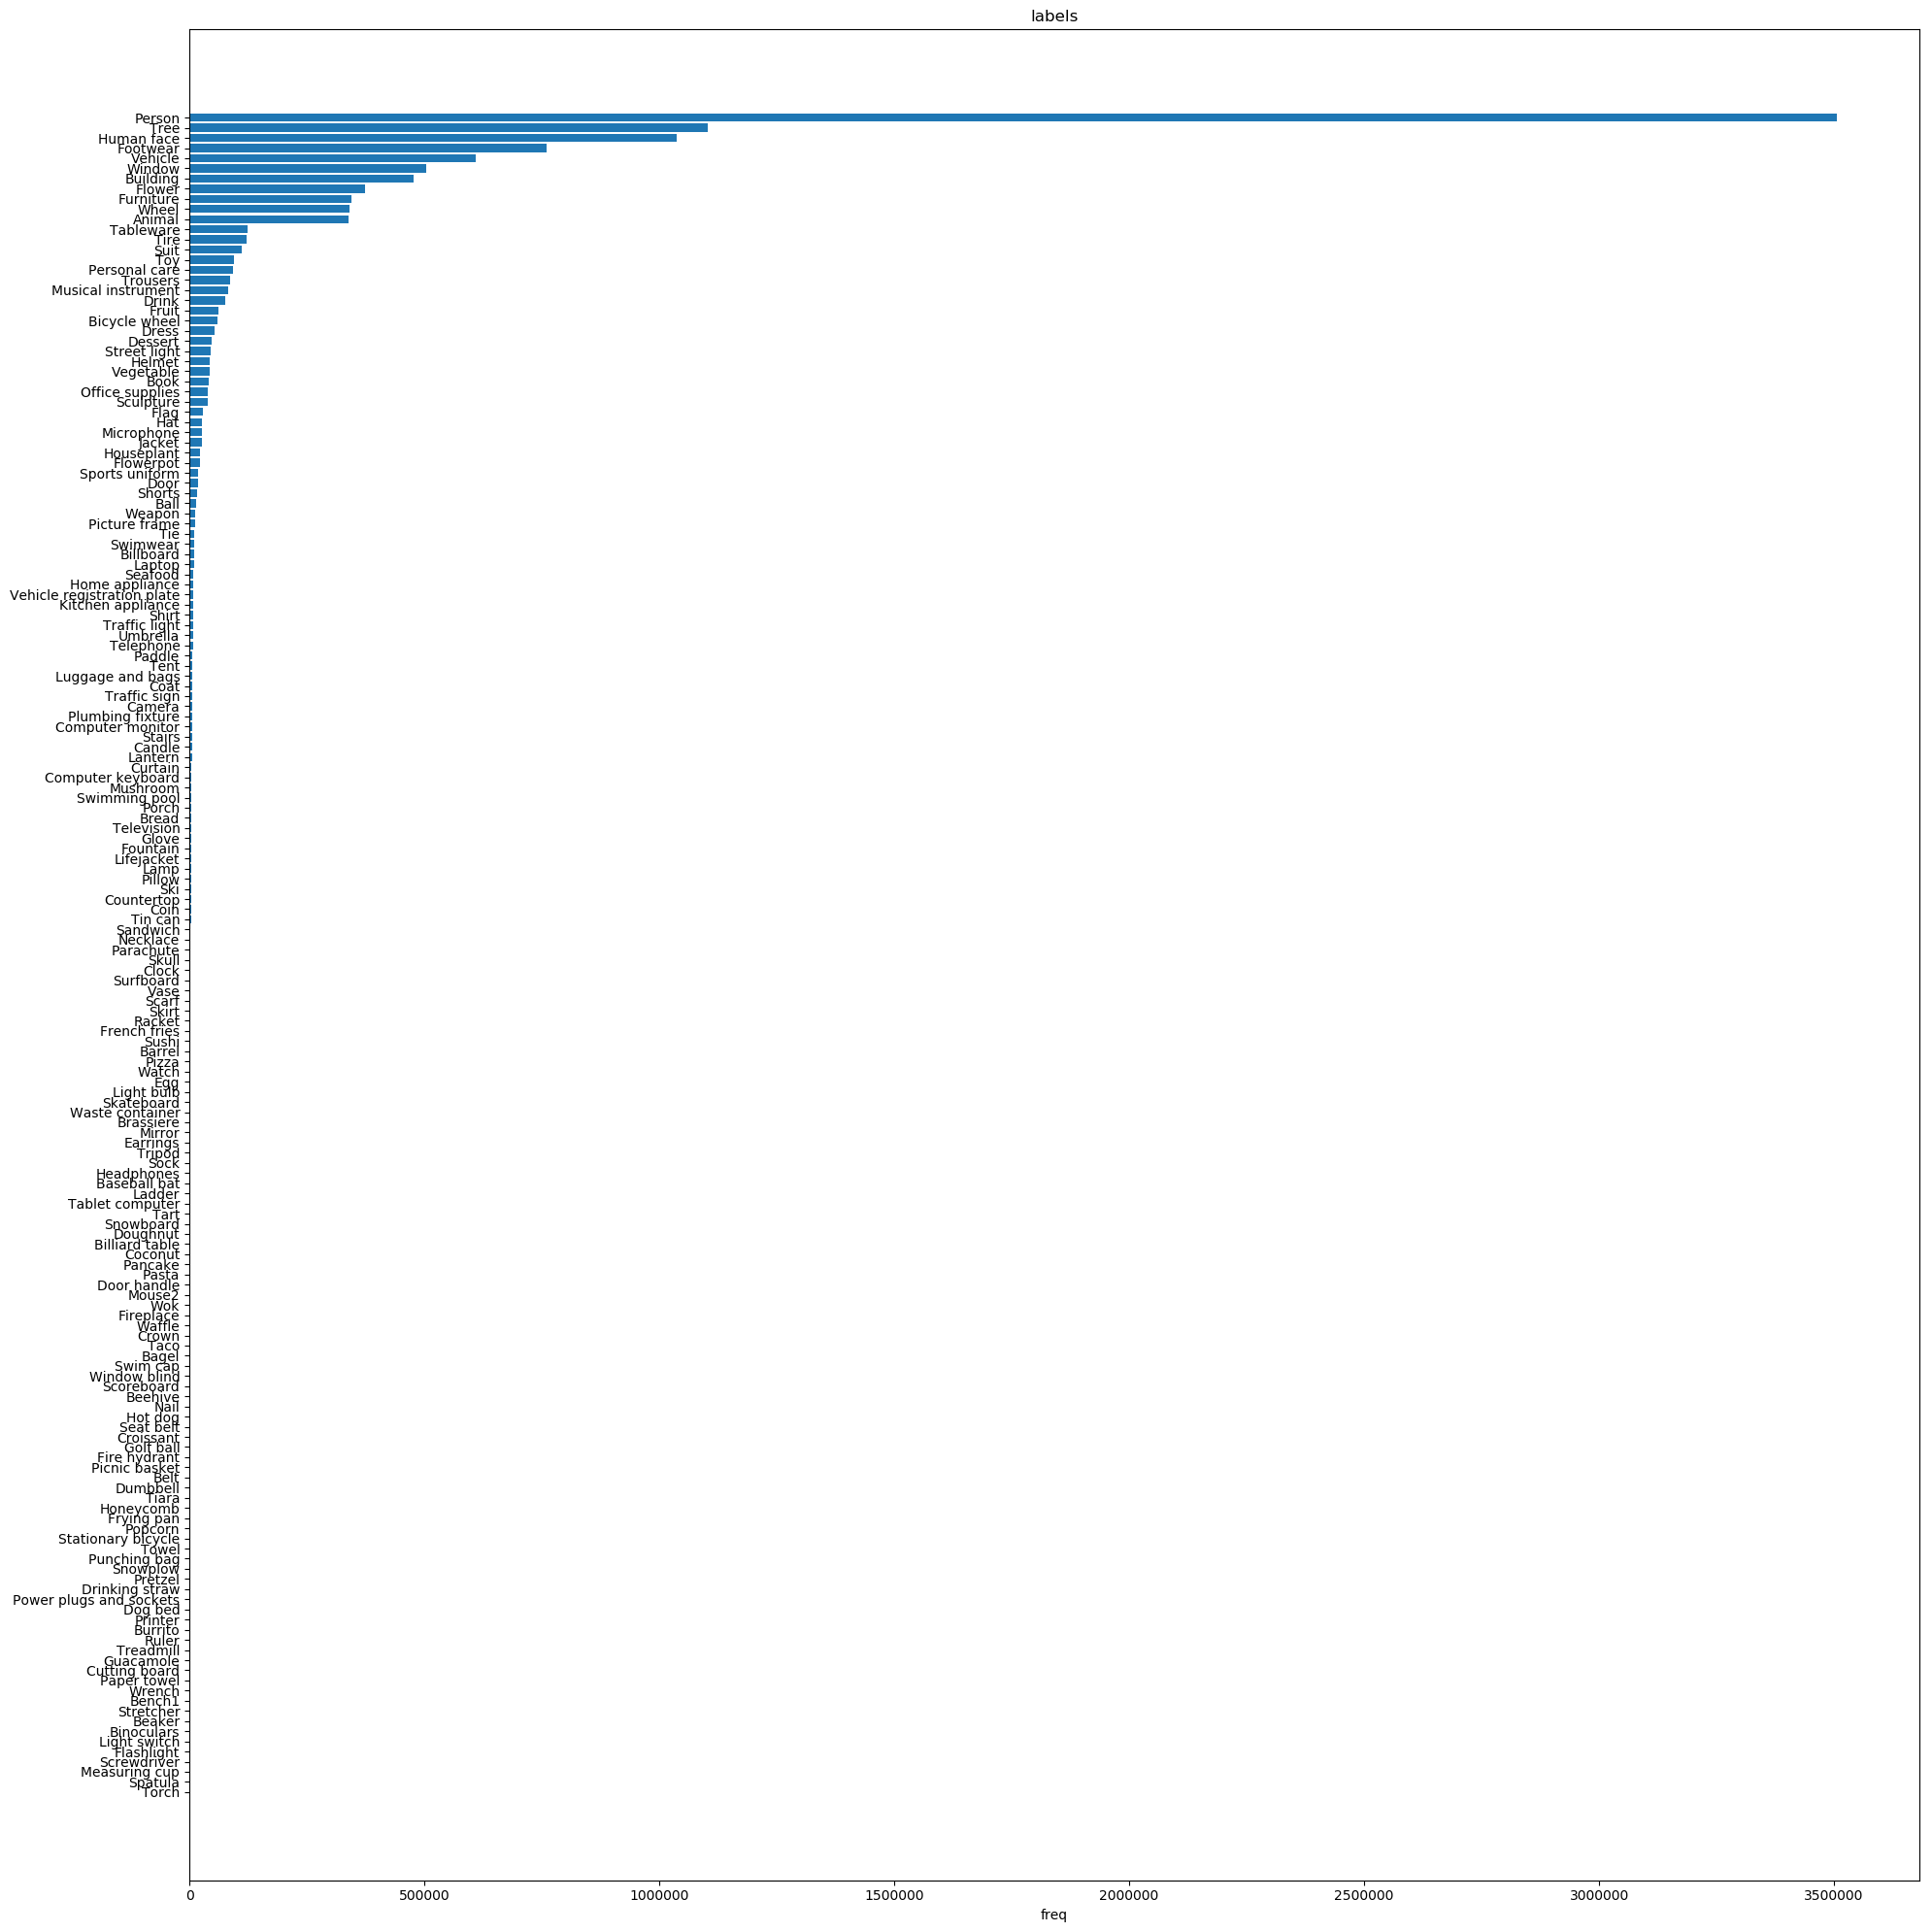

../data_info/subsets/5/dict_label_info.pkl


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


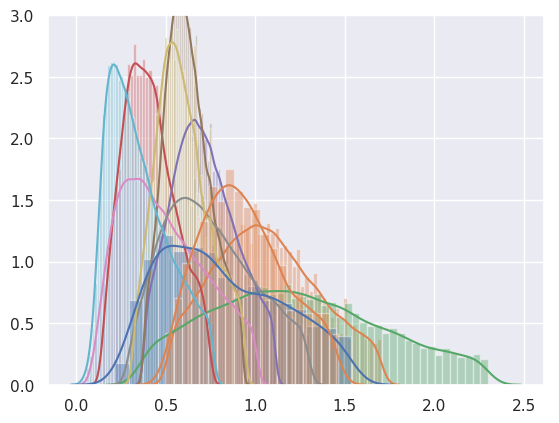

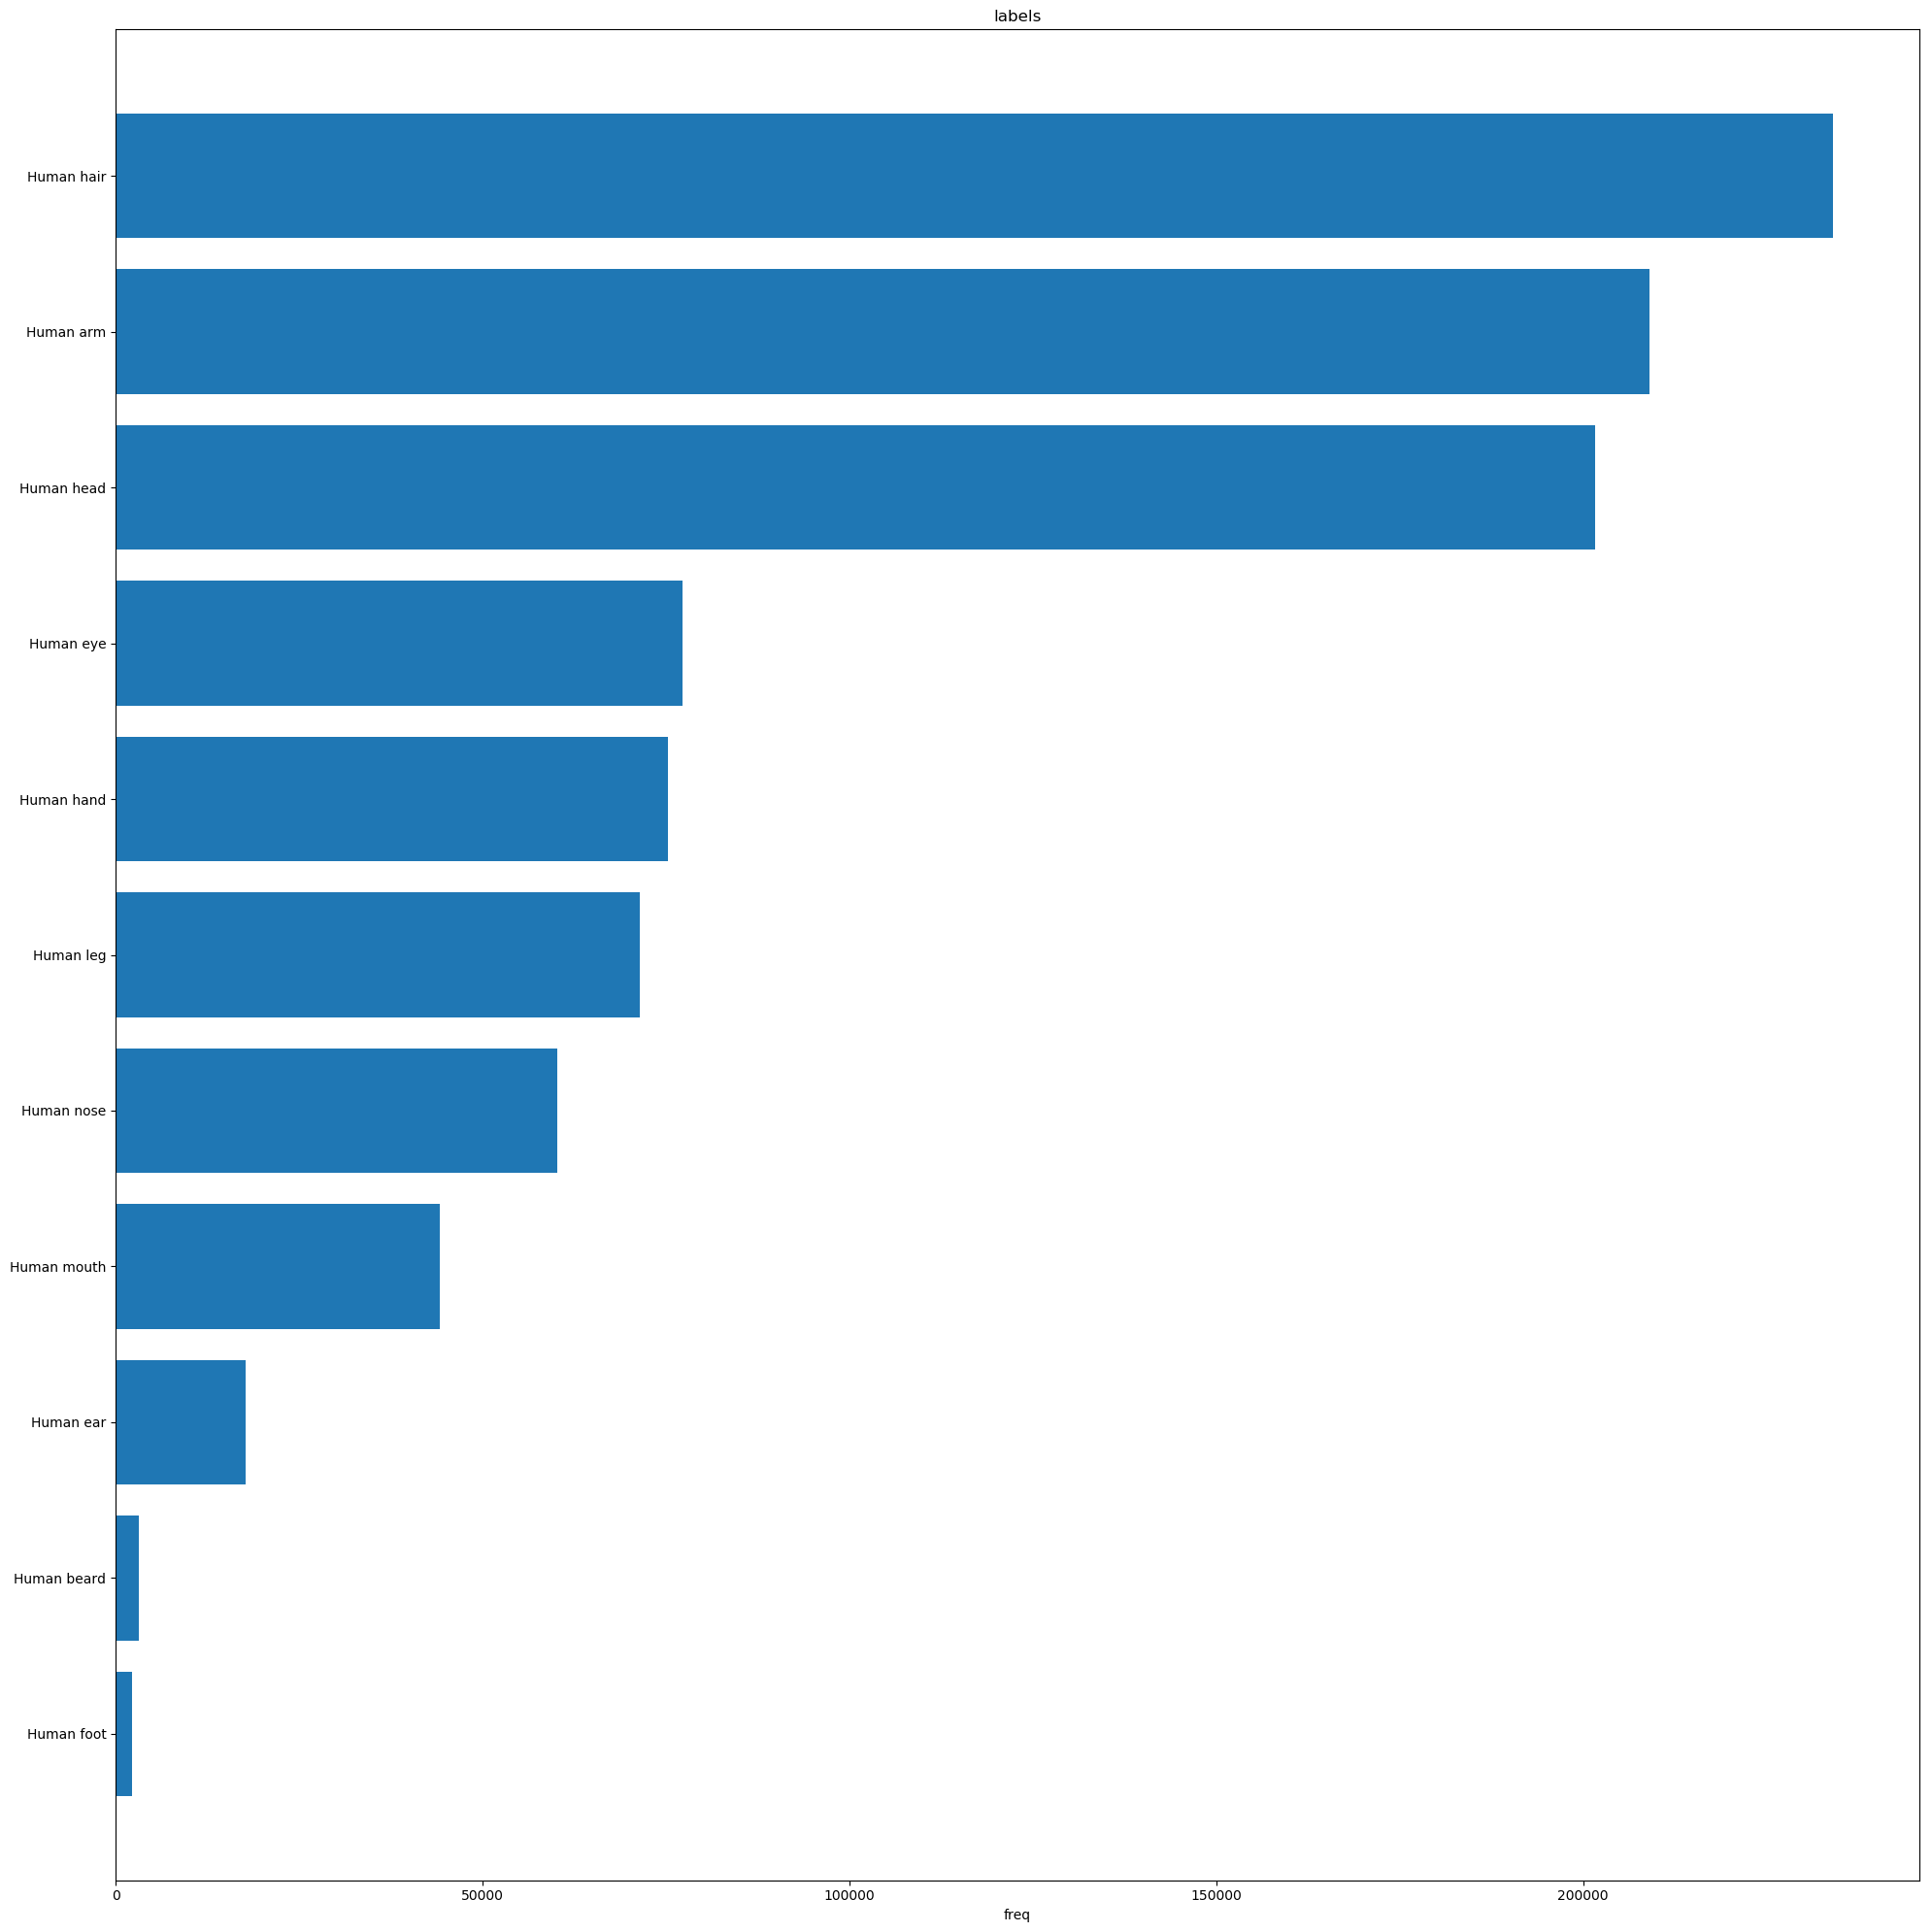

In [5]:
# sub_dir = all_subsets[1]
for sub_dir in all_subsets:
    subset_dict_info_dir = sub_dir+"dict_label_info.pkl"
    subset_clsids_to_names_dir = sub_dir+"clsids_to_names.json"
    print(subset_dict_info_dir)
    subset_dict_info = pickle.load(open(subset_dict_info_dir,'rb'))
    subset_clsids_to_names = json.load(open(subset_clsids_to_names_dir,'r'))
    subset_names_to_clsids = {v:k for k, v in subset_clsids_to_names.items()}
    total_imgs, lbs, dict_balanced = display_ratios(subset_dict_info, subset_names_to_clsids)
    get_class_img_bar(total_imgs,lbs)
    with open(sub_dir+"/"+'train_dict_clsid_to_list_imgs.json', 'w') as handle:
        json.dump(dict_balanced, handle)

../data_info/subsets/5/dict_label_info.pkl


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


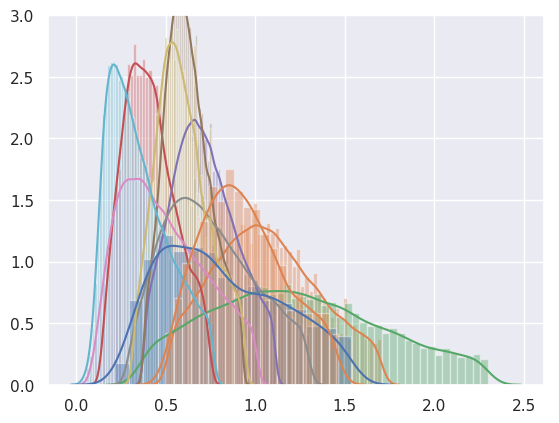

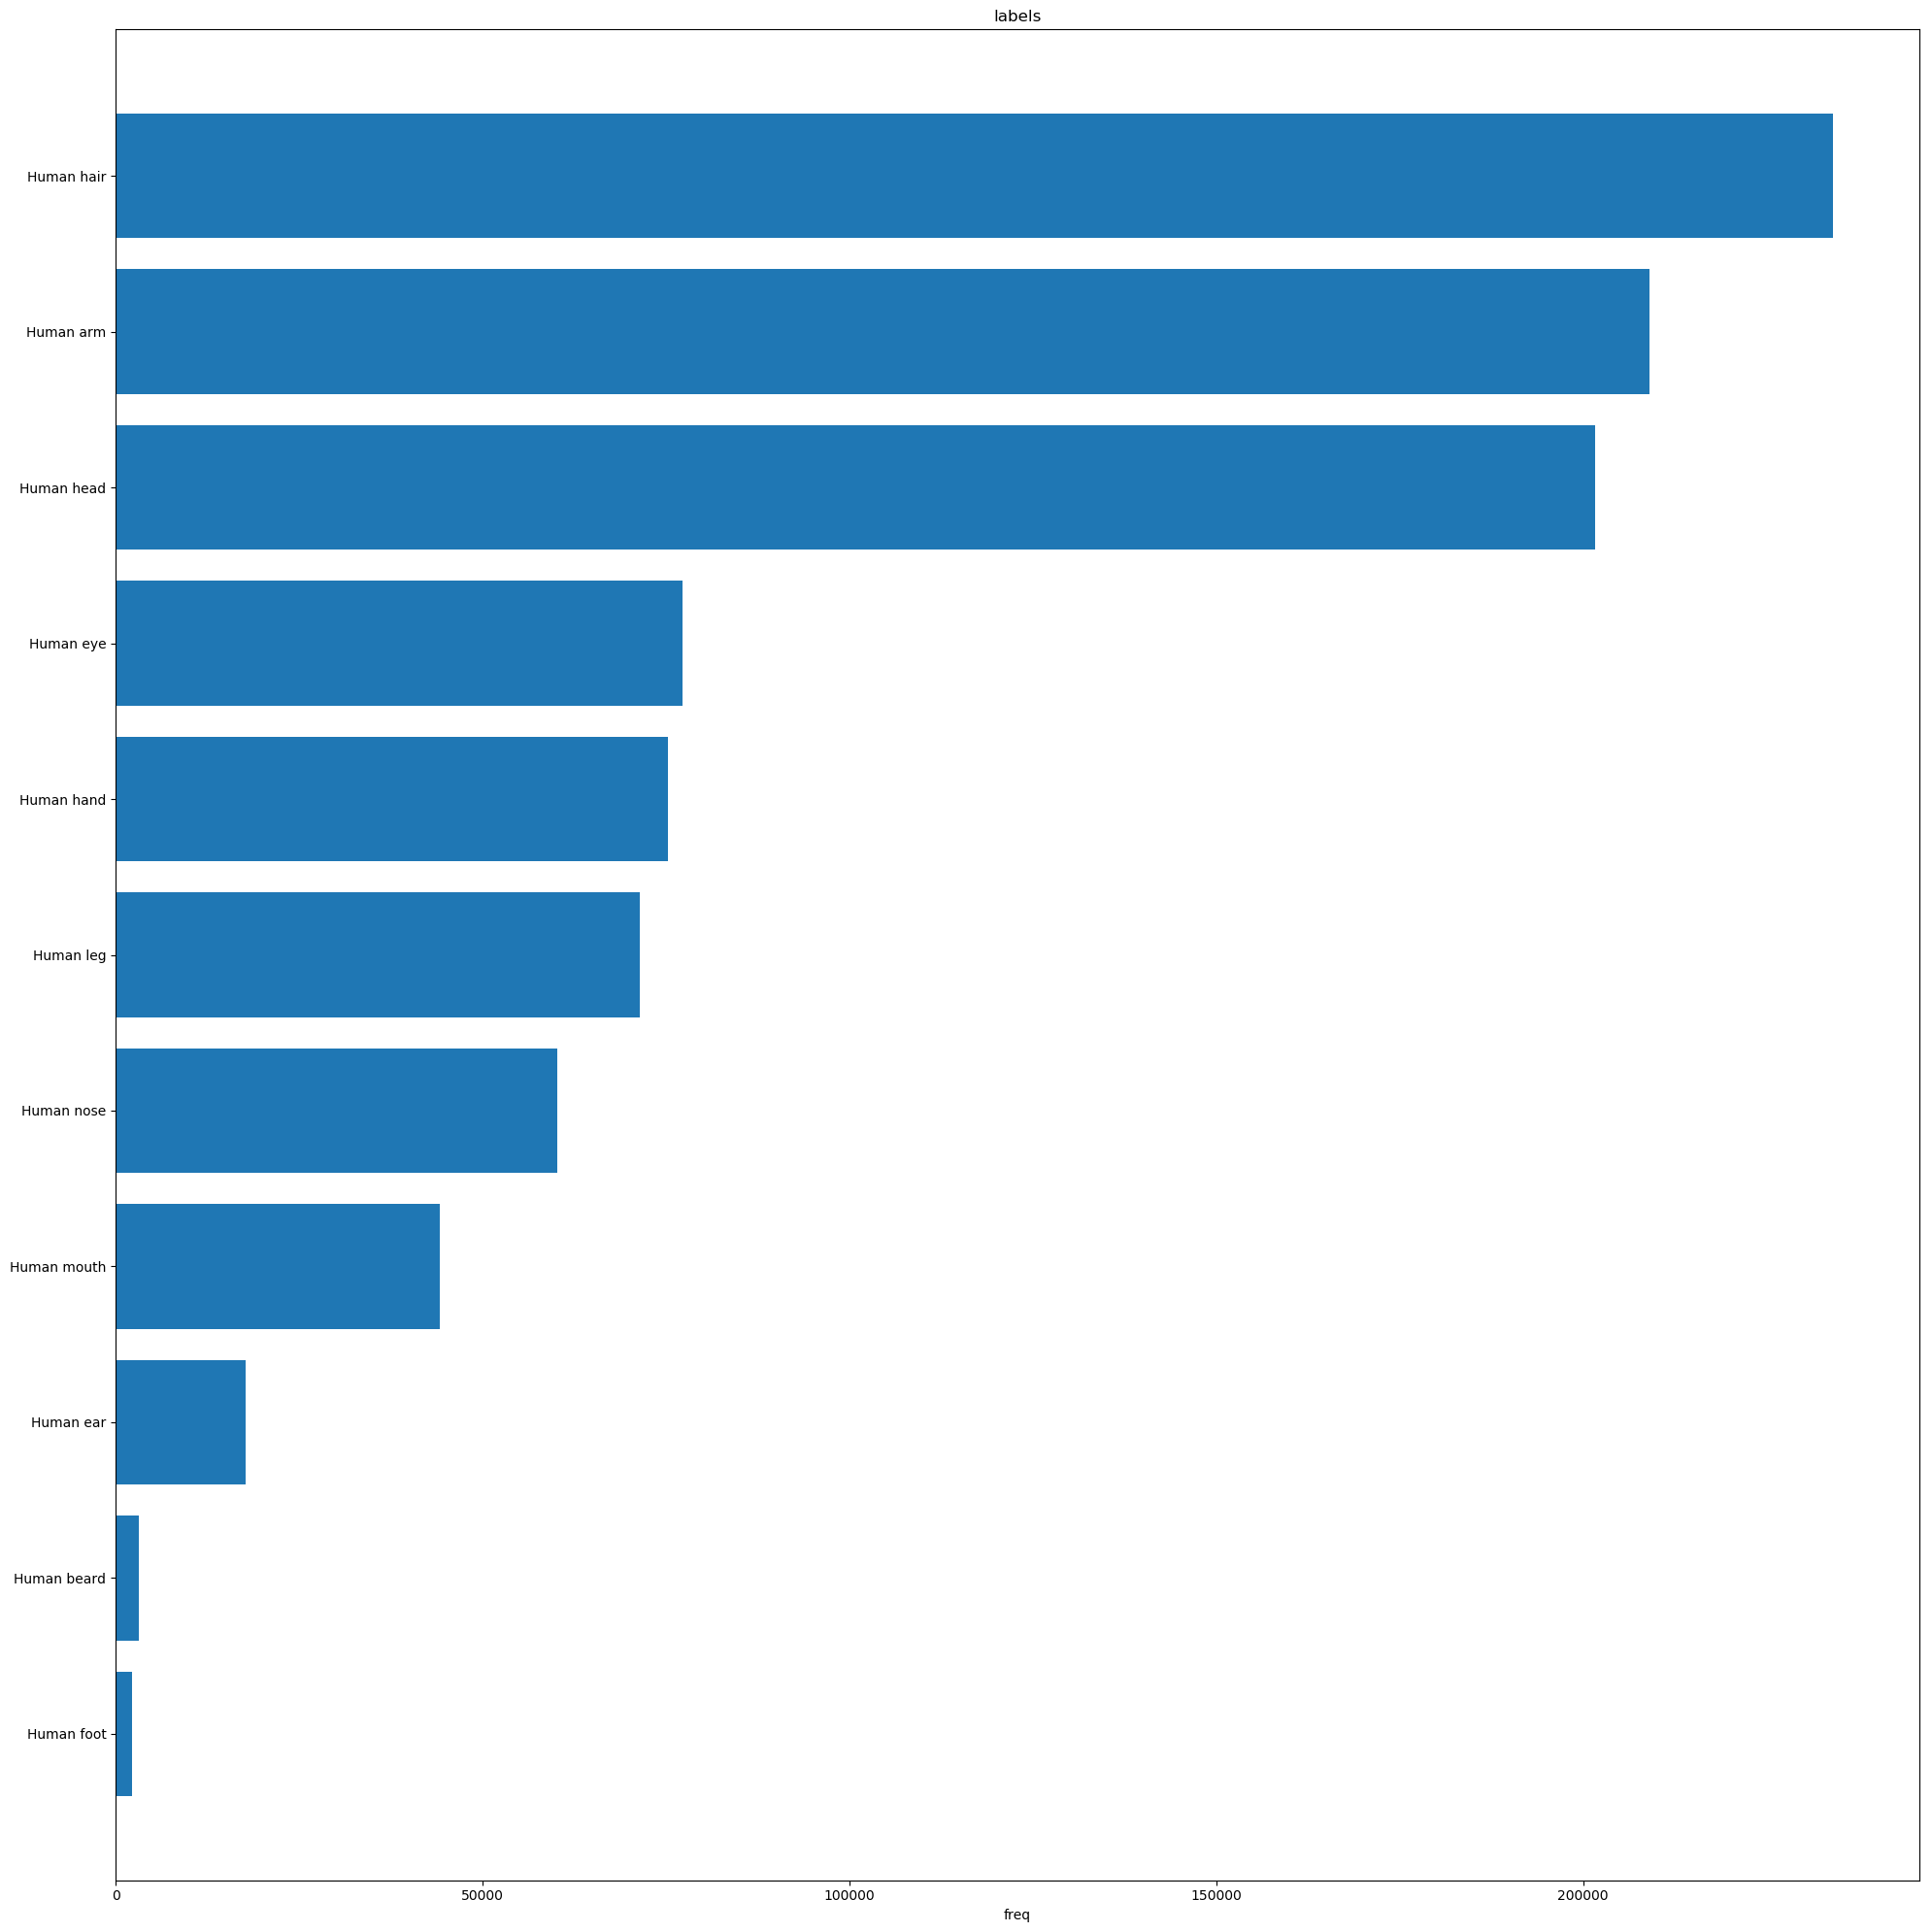

In [8]:
# HANDLE THE HUMAN LABELS
sub_dir = all_subsets[5]
subset_dict_info_dir = sub_dir+"dict_label_info.pkl"
subset_clsids_to_names_dir = sub_dir+"clsids_to_names.json"
print(subset_dict_info_dir)
subset_dict_info = pickle.load(open(subset_dict_info_dir,'rb'))
subset_clsids_to_names = json.load(open(subset_clsids_to_names_dir,'r'))
subset_names_to_clsids = {v:k for k, v in subset_clsids_to_names.items()}
total_imgs, lbs, dict_balanced = display_ratios(subset_dict_info, subset_names_to_clsids, True)
get_class_img_bar(total_imgs,lbs)

with open(sub_dir+"/"+'train_dict_clsid_to_list_imgs.json', 'w') as handle:
    json.dump(dict_balanced, handle)

In [32]:
subset_dict_info_dir = all_every
print(subset_dict_info_dir)
subset_dict_info = pickle.load(open(subset_dict_info_dir,'rb'))

../data_info/all/dict_label_info.pkl


In [121]:
dict_clsid_to_list_imgs = {
    'a':['1','2','3'],
    'b':['4','5','6'],
    'c':['7','9']
}

In [23]:
from numpy.random import choice

In [118]:
dict_distributions = {
    'a':0.1,
    'b':0.89999999,
    'c':0.0,
    'd':0.0,
}

In [119]:
list_of_candidates = list(dict_distributions.keys())
probability_distribution = list(dict_distributions.values())

In [120]:
draw = choice(list_of_candidates, p=probability_distribution)
draw

'a'

In [122]:
dict_clsid_to_list_imgs[draw]

['1', '2', '3']

In [123]:
choice(dict_clsid_to_list_imgs[draw])

'2'

In [49]:
a = {
    "/m/014sv8": 0.09090909090909091,
    "/m/015h_t": 0.09090909090909091,
    "/m/0283dt1": 0.09090909090909091,
    "/m/031n1": 0.09090909090909091,
    "/m/035r7c": 0.09090909090909091,
    "/m/039xj_": 0.09090909090909091,
    "/m/03q69": 0.09090909090909091,
    "/m/04hgtk": 0.09090909090909091,
    "/m/0dzf4": 0.09090909090909091,
    "/m/0k0pj": 0.09090909090909091,
    "/m/0k65p": 0.09090909090909091,
    "background": 0.0
}

In [50]:
len(a)

12

In [51]:
import numpy as np
np.sum(list(a.values()))

1.0

In [52]:
1/11

0.09090909090909091

In [54]:
list(range(0,12))
draw = choice(list(range(0,12)), p=list(a.values()))
draw

6

In [71]:
for i in [-4,-3, -2,-1,0,1,2,3]:
    print(2**(i/3))

0.3968502629920499
0.5
0.6299605249474366
0.7937005259840998
1.0
1.2599210498948732
1.5874010519681994
2.0


In [60]:
2**0

1

In [ ]:
0.6299605249474366, 0.7937005259840998, 1.0, 1.2599210498948732, 1.5874010519681994